In [122]:
import pandas as pd

In [123]:
df = pd.read_csv('../data/01_raw/iowa_dataset.csv')

In [124]:
df.head()

,invoice_line_no,date,store,name,address,city,zipcode,county,category,category_name,...,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,sale_bottles,sale_dollars,sale_liters,sale_gallons,store_location,county_number
0,INV-50346800002,2022-08-16,5359,FAREWAY STORES #168/ PEOSTA,8400 NICC DRIVE,PEOSTA,52068.0,DUBUQUE,1062400.0,SPICED RUM,...,12,750,6.00,9.00,12,108.00,9.00,2.37,NaN,NaN
1,INV-50288400002,2022-08-12,2524,HY-VEE FOOD STORE / DUBUQUE,3500 DODGE ST,DUBUQUE,52001.0,DUBUQUE,1012200.0,SCOTCH WHISKIES,...,12,1000,28.24,42.36,6,254.16,6.00,1.58,NaN,NaN
2,INV-50389200010,2022-08-17,3705,LIQUOR LOCKER,507 1ST AVE #100,ROCK RAPIDS,51246.0,LYON,1012100.0,CANADIAN WHISKIES,...,12,1000,6.64,9.96,12,119.52,12.00,3.17,NaN,NaN
3,INV-50258200004,2022-08-11,5107,KUM & GO #4098 / WINDSOR HEIGHTS,7229 UNIVERSITY AVE,WINDSOR HEIGHTS,50311.0,POLK,1012100.0,CANADIAN WHISKIES,...,8,50,8.50,12.75,1,12.75,0.05,0.01,NaN,NaN
4,INV-50378700007,2022-08-16,5203,KIMMES COON RAPIDS COUNTRY STORE #12,"516, HIGHWAY 141",COON RAPIDS,50058.0,CARROLL,1701100.0,TEMPORARY & SPECIALTY PACKAGES,...,12,750,17.49,26.24,12,314.88,9.00,2.37,"{'type': 'Point', 'coordinates': [-94.678386, ...",NaN


In [125]:
data = df[['date', 'sale_dollars']]

In [126]:
data.dtypes


date             object
sale_dollars    float64
dtype: object

In [127]:
data.sample(5)

,date,sale_dollars
5319538,2021-06-05,135.00
6760577,2022-05-31,42.30
260986,2022-10-14,40.50
6398307,2021-12-10,103.50
6200997,2022-05-18,269.76


In [128]:
data.dropna()

,date,sale_dollars
0,2022-08-16,108.00
1,2022-08-12,254.16
2,2022-08-17,119.52
3,2022-08-11,12.75
4,2022-08-16,314.88
...,...,...
7801637,2020-01-30,6.16
7801638,2020-01-31,233.52
7801639,2020-01-31,119.28
7801640,2020-01-29,2281.20


In [129]:
# Converting "date" column to "datetime" type using "pandas" library:
df2 = data.copy()

df2['date'] = pd.to_datetime(df2['date'], format='%Y-%m-%d', errors='coerce')

In [130]:
df2.dtypes

date            datetime64[ns]
sale_dollars           float64
dtype: object

In [131]:
df2.set_index('date', inplace=True)

In [132]:
df2.sample(5)

,sale_dollars
date,
2021-05-28,69.75
2022-11-29,324.00
2021-02-09,36.00
2022-12-22,138.00
2020-10-23,110.30


In [133]:
df2.describe()

,sale_dollars
count,7.801642e+06
mean,1.606799e+02
std,5.701766e+02
min,-9.720000e+03
25%,4.200000e+01
50%,8.700000e+01
75%,1.630800e+02
max,2.509320e+05


In [134]:
df_weekly = pd.DataFrame(df2)
df_monthly = pd.DataFrame(df2)

In [135]:
monthly_sales = df_weekly.resample('M').mean()

In [136]:
# Plotting data
import matplotlib.pyplot as plt

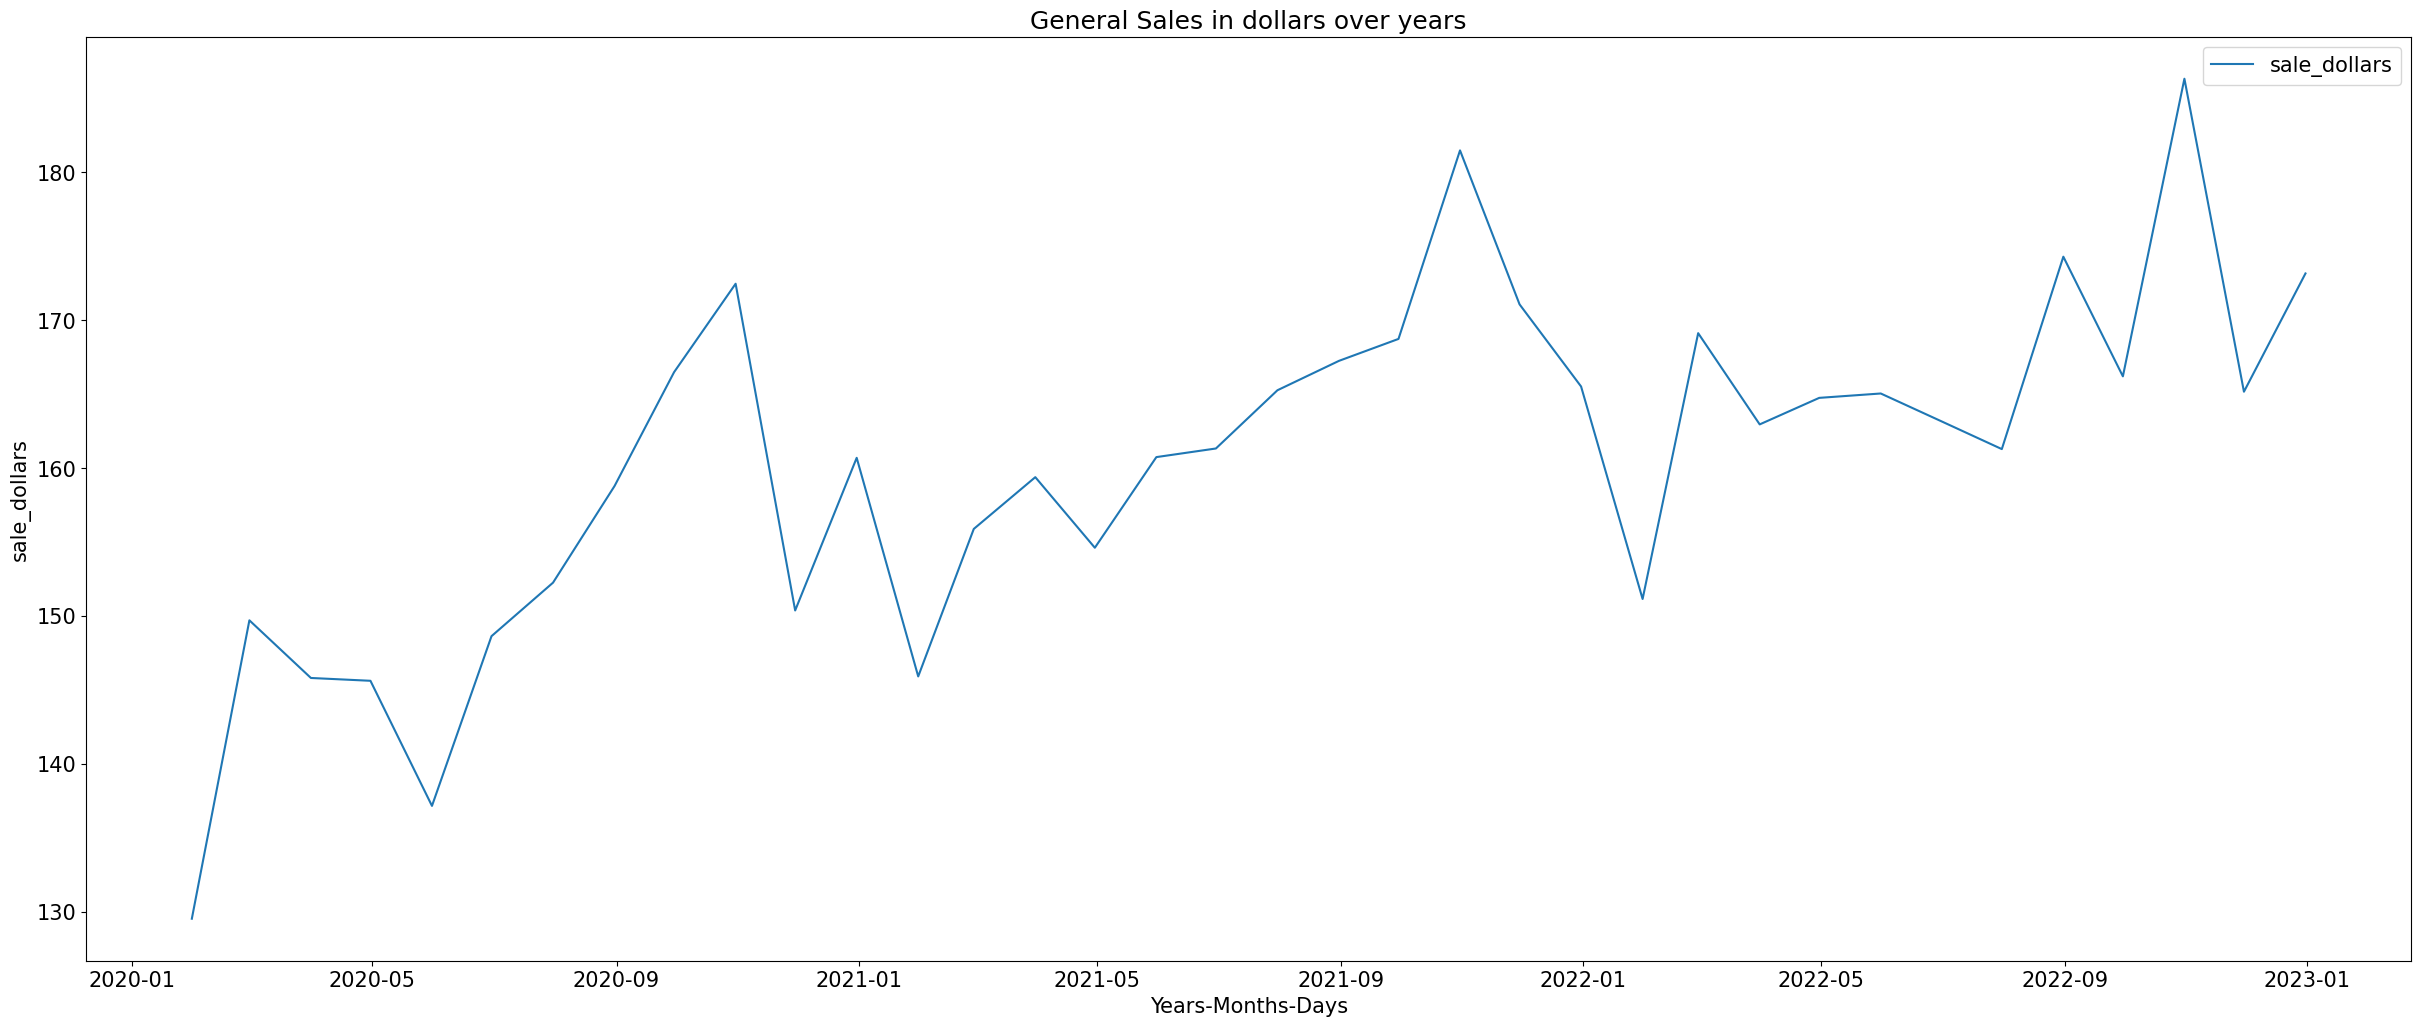

In [137]:
plt.figure(figsize= (30,12))
plt.plot(monthly_sales['sale_dollars'], label = "sale_dollars")
plt.legend()
plt.title('General Sales in dollars over years')
plt.xlabel("Years-Months-Days")
plt.ylabel("sale_dollars")
plt.show();

In [138]:
weekly_sales = df_monthly.resample('W').mean()

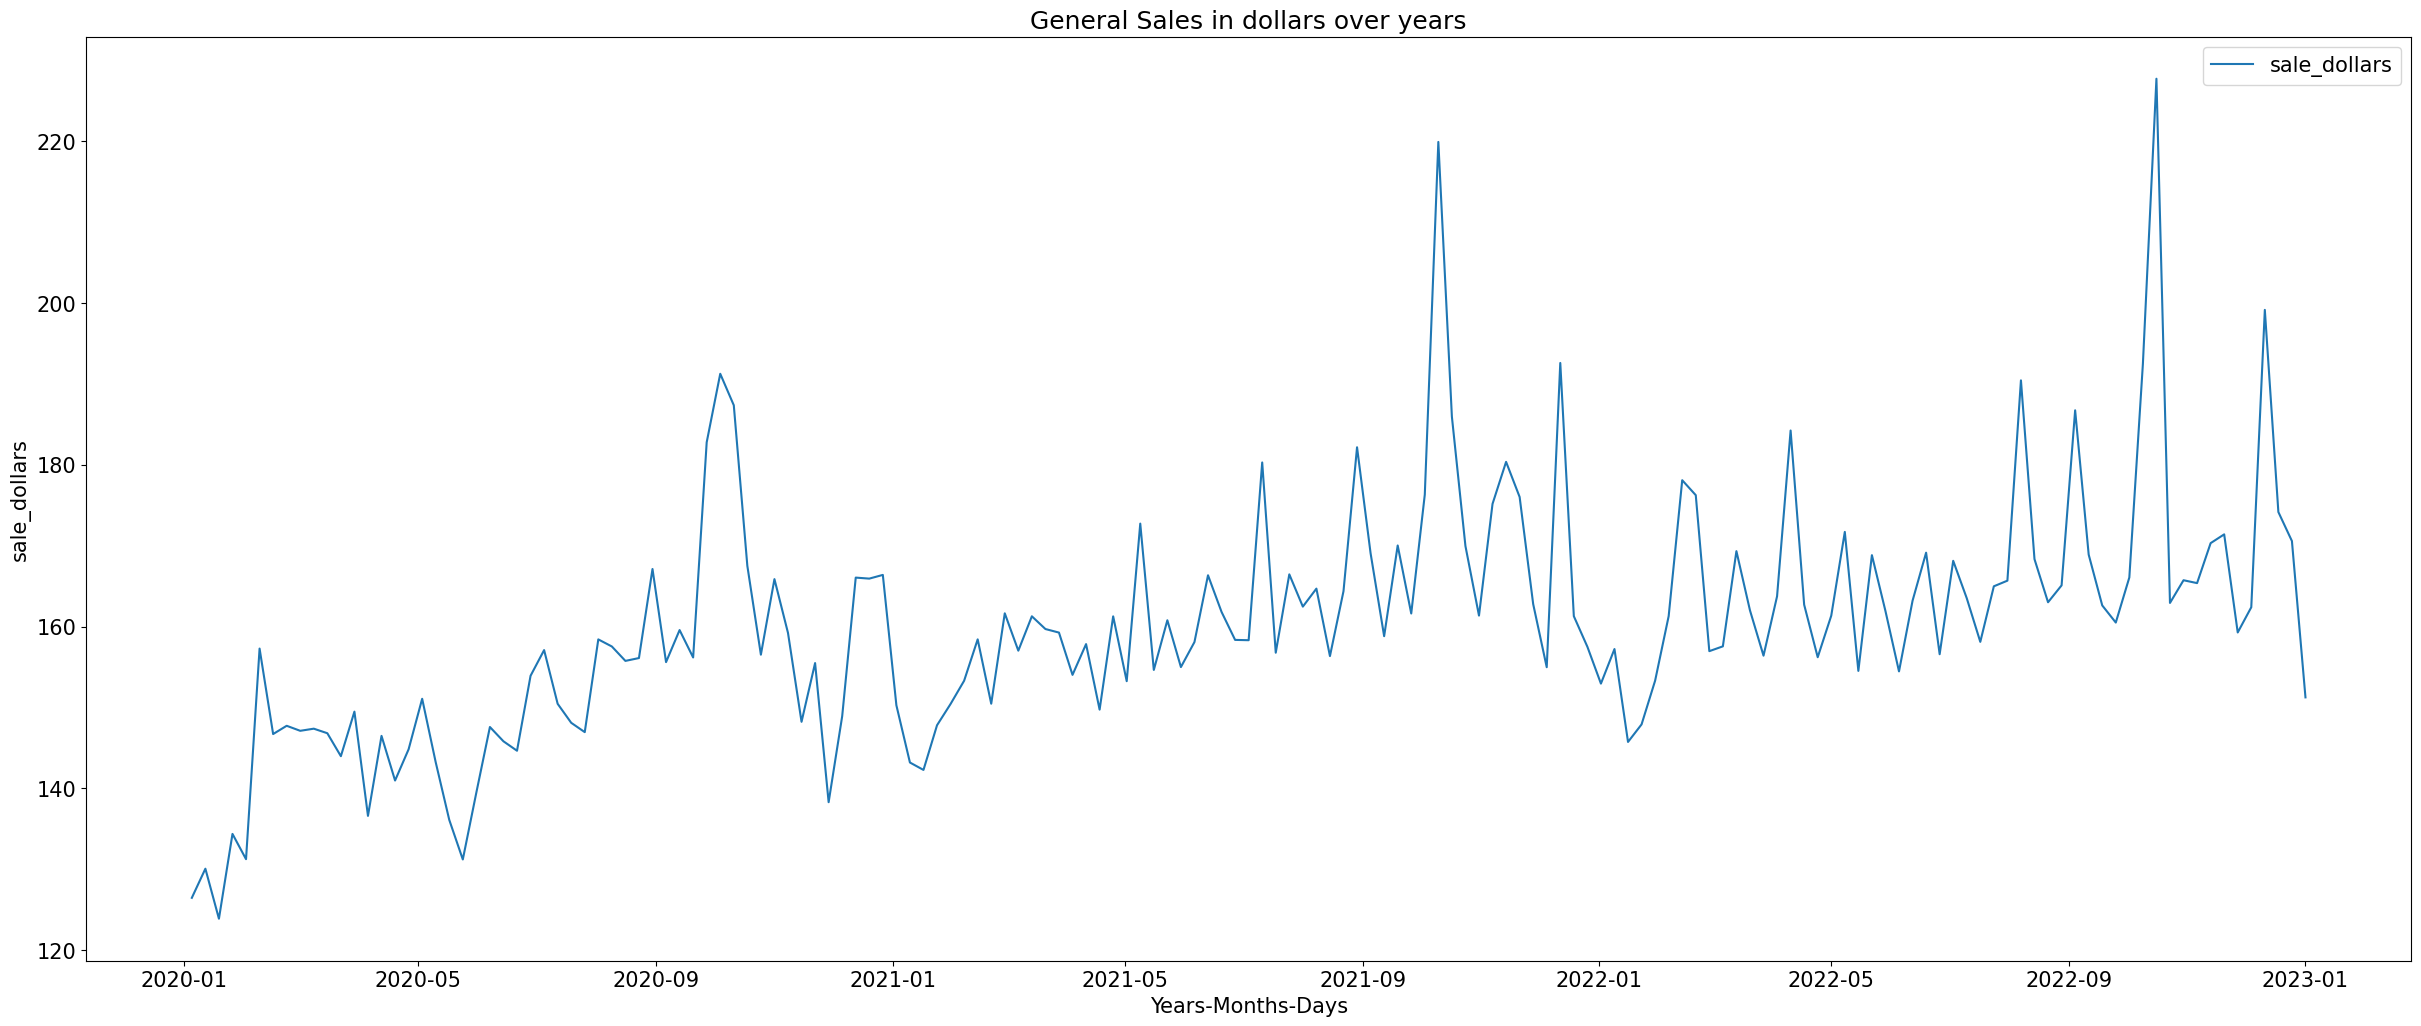

In [139]:
plt.figure(figsize= (30,12))
plt.plot(weekly_sales['sale_dollars'], label = "sale_dollars")
plt.legend()
plt.title('General Sales in dollars over years')
plt.xlabel("Years-Months-Days")
plt.ylabel("sale_dollars")
plt.show();

Checking Signal Decomposition

In [140]:
df2 = df2[df2['sale_dollars'] > 0]

In [141]:
df2Sarimax = df2.resample('W').mean()

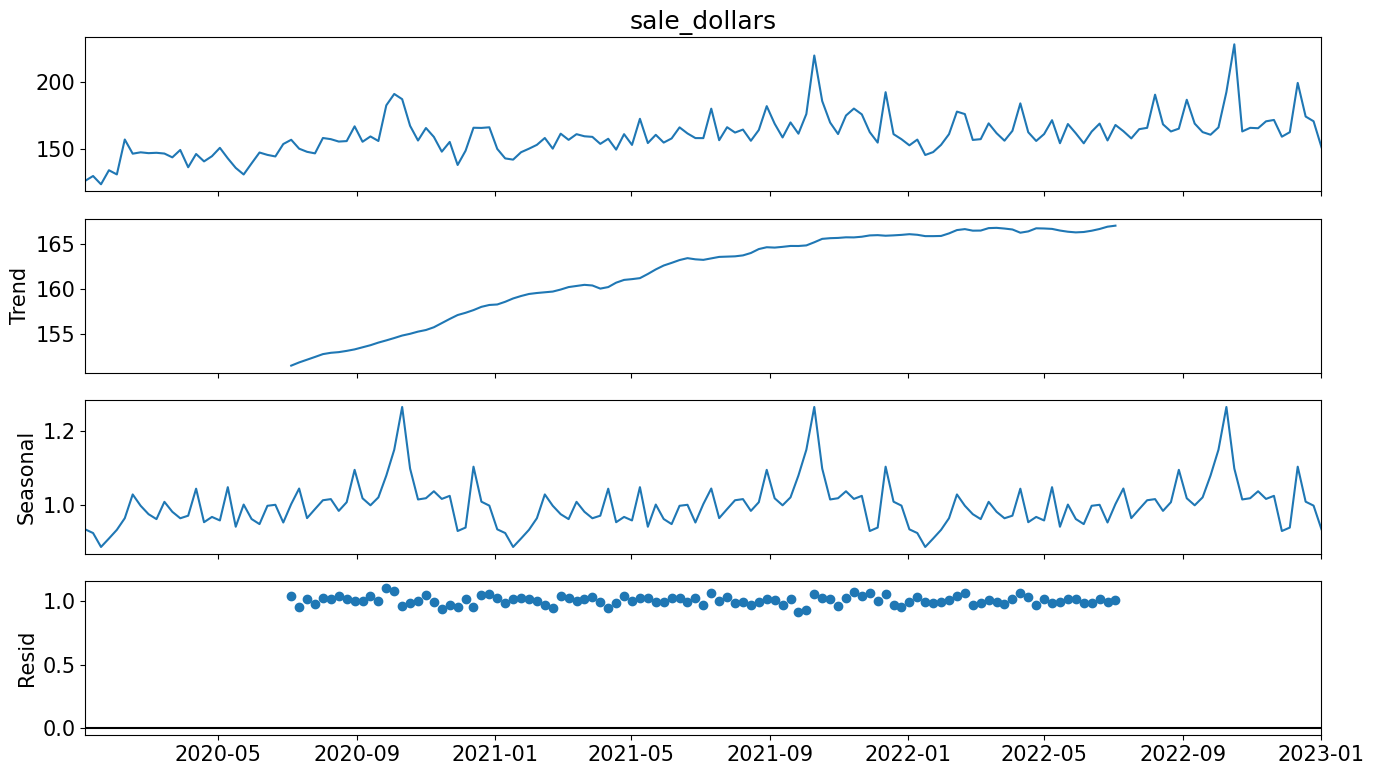

In [142]:
# plot all the components after decomposition:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.rc('figure',figsize=(14,8))
plt.rc('font',size=15)

result = seasonal_decompose(df2Sarimax['sale_dollars'],model='multiplicative')
fig = result.plot()

Stationarity checking:

A stationary time series is one whose statistical properties,
such as mean and variance, remain constant over time.

Non-stationary time series may exhibit trends or seasonality,
making it challenging to model and forecast accurately.

In [143]:
from statsmodels.tsa.stattools import adfuller

#Ho: It is non stationary
#H1: It is stationary
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root, indicating it is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary")

In [144]:
adfuller_test(df2Sarimax['sale_dollars'])

ADF Test Statistic : -3.7020182084793007
p-value : 0.004084855621590764
#Lags Used : 3
Number of Observations Used : 153
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root, indicating it is stationary


In [145]:
def check_stationarity(ts):
    dftest = adfuller(ts)
    adf = dftest[0]
    pvalue = dftest[1]
    print(pvalue)
    critical_value = dftest[4]['5%']
    if (pvalue < 0.05) and (adf < critical_value):
        print('The series is stationary')
    else:
        print('The series is NOT stationary')

In [146]:
check_stationarity(df2Sarimax['sale_dollars'])

0.004084855621590764
The series is stationary


Plot ACF and PACF

In [147]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

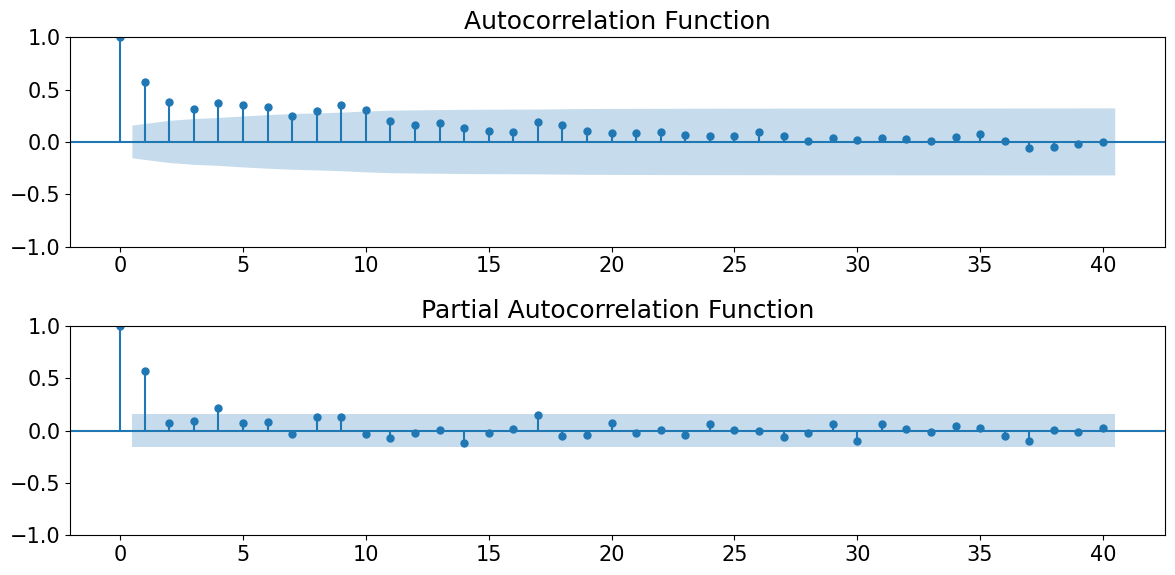

In [148]:
# plot ACF and PACF on initial given sales values:
# Create a 2x1 subplot grid
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12, 6))

# Plot Autocorrelation Function (ACF)
plot_acf(df2Sarimax['sale_dollars'], lags=40, ax=ax1)
ax1.set_title('Autocorrelation Function')

# Plot Partial Autocorrelation Function (PACF)
plot_pacf(df2Sarimax['sale_dollars'], lags=40, ax=ax2)
ax2.set_title('Partial Autocorrelation Function')

# Adjust layout for better readability
plt.tight_layout()

# Show the plots
plt.show()

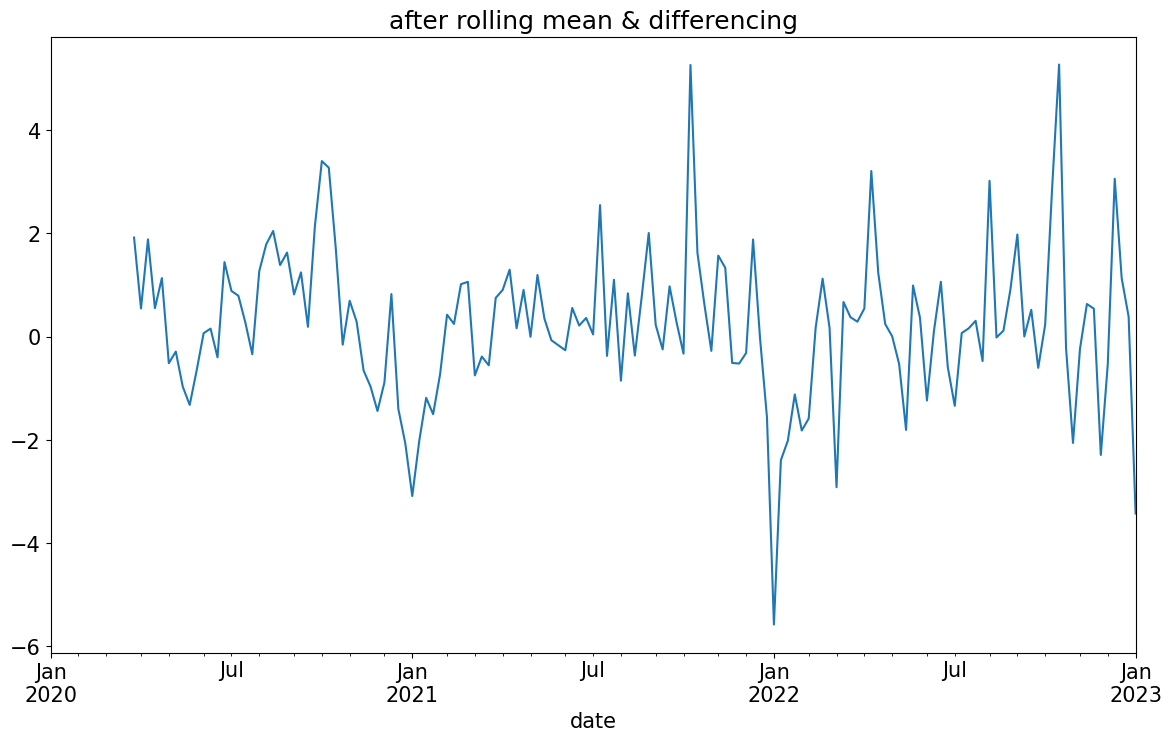

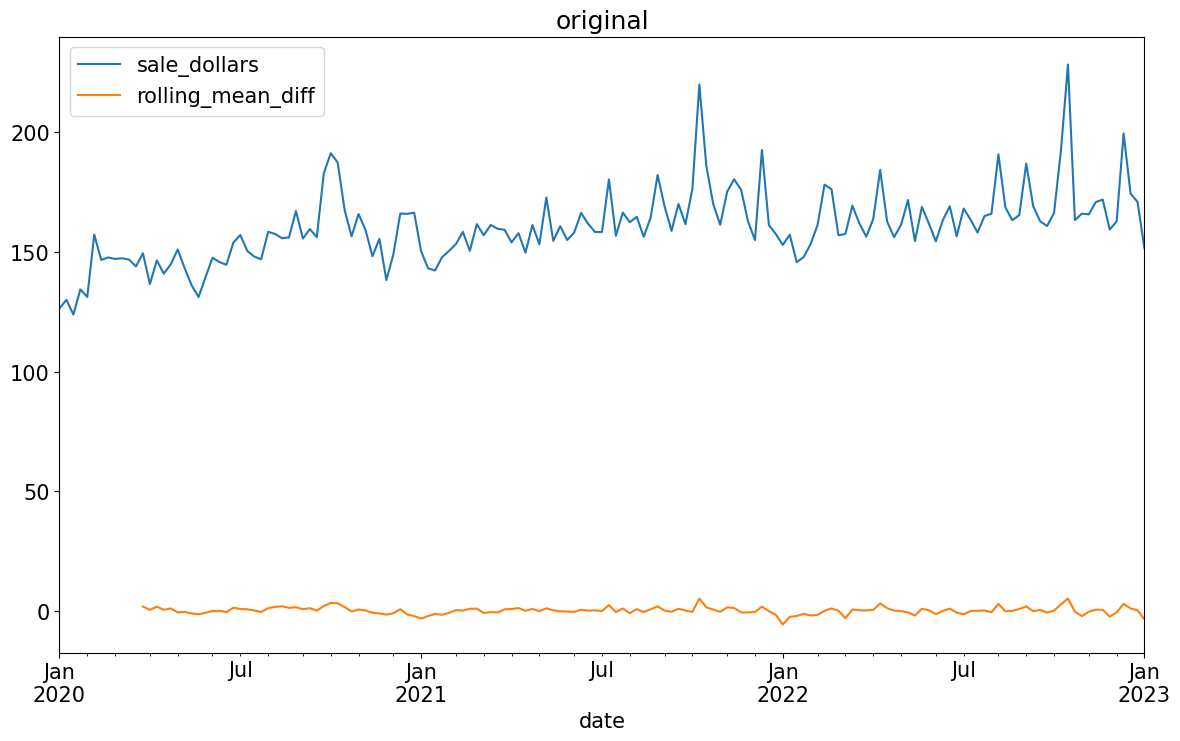

In [149]:
rolling_mean = df2Sarimax.rolling(window=12).mean()
df2Sarimax['rolling_mean_diff'] = rolling_mean - rolling_mean.shift()
ax1 = plt.subplot()
df2Sarimax['rolling_mean_diff'].plot(title='after rolling mean & differencing');
ax2 = plt.subplot()
df2Sarimax.plot(title='original');

ARIMA

In [150]:
#ARIMA
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

In [151]:
arima_model = ARIMA(weekly_sales['sale_dollars'], order=(12,0,3))

In [153]:
best_model = auto_arima(weekly_sales['sale_dollars'], seasonal=False, m=1,
                        start_p=0, start_q=0, max_p=5, max_q=5, d=1,
                        trace=True, error_action='ignore', suppress_warnings=True)

print(arima_model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1261.535, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1251.178, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1226.676, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1259.556, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1216.892, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1218.565, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1217.389, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1242.910, Time=0.07 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1220.305, Time=0.18 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1217.709, Time=0.05 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 0.945 seconds


In [154]:
#arima_model_fit = best_model.fit(weekly_sales['sale_dollars'])
arima_model_fit = arima_model.fit()

In [155]:
arima_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      rolling_mean_diff   No. Observations:                  145
Model:                ARIMA(12, 0, 3)   Log Likelihood                -221.684
Date:                Fri, 29 Dec 2023   AIC                            477.369
Time:                        21:59:06   BIC                            527.973
Sample:                    03-29-2020   HQIC                           497.931
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2310      0.143      1.620      0.105      -0.048       0.510
ar.L1         -0.0623      0.168     -0.370      0.711      -0.392       0.267
ar.L2          0.1780      0.181      0.981      0.326      -0.178       0.534
ar.L3          0.1287      0.185      0.694      0.487      -0.235       0.492
ar.L4          0.1233      0.133      0.930      0.352      -0.137       0.383
ar.L5          0.0265      0.108      0.245      0.806      -0.186       0.239
ar.L6          0.0269      0.097      0.278      0.781      -0.163       0.217
ar.L7         -0.0663      0.104     -0.635      0.525      -0.271       0.138
ar.L8          0.0398      0.086      0.462      0.644      -0.129       0.208
ar.L9          0.1579      0.075      2.110      0.035       0.011       0.305
ar.L10         0.0819      0.077      1.067      0.286      -0.068       0.232
ar.L11        -0.0510      0.081     -0.632      0.528      -0.209       0.107
ar.L12        -0.5438      0.076     -7.179      0.000      -0.692      -0.395
ma.L1          0.5024      0.190      2.638      0.008       0.129       0.876
ma.L2         -0.0391      0.212     -0.184      0.854      -0.455       0.377
ma.L3         -0.2042      0.212     -0.963      0.336      -0.620       0.211
sigma2         1.2050      0.135      8.935      0.000       0.941       1.469
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                33.45
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.48   Skew:                             0.79
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [156]:
# check the shape of the model
weekly_sales.shape

(157, 2)

In [157]:
# forecast the model:
weekly_sales['forecast'] = arima_model_fit.predict(start = 130, end = 156, dynamic = True)

<Axes: xlabel='date'>

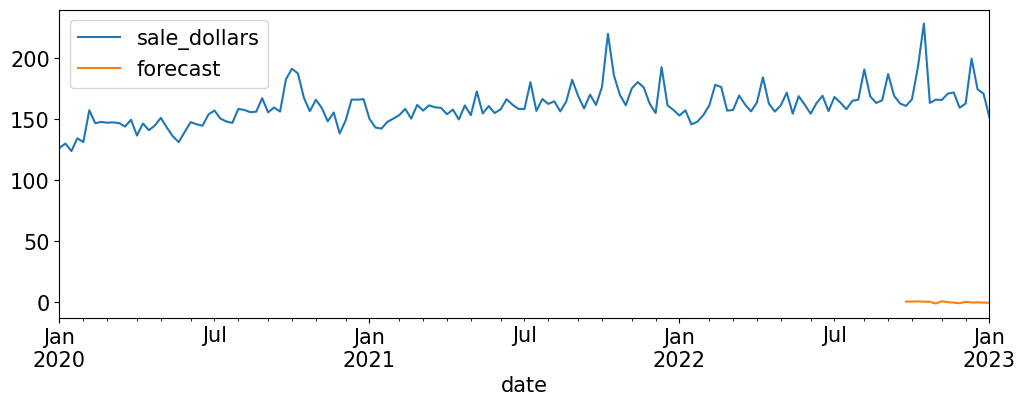

In [158]:
# compare the foracasted value by plotting actual values together:
weekly_sales[['sale_dollars', 'forecast']].plot(figsize=(12,4))

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm

SARIMAX

In [ ]:
weekly_sarimax = df_weekly.resample('W').mean()

In [ ]:
# Initialize the SARIMA Model
sarima_model=sm.tsa.statespace.SARIMAX(weekly_sarimax['sale_dollars'],order=(1, 1, 1),seasonal_order=(14,1,0,12))
# trzeba pobawić się tymi wartościami order i seasonal_order, żeby skonfigurować odpowiednio model

In [ ]:
# Fitting the SARIMA model:
sarima_model_fit = sarima_model.fit()

In [ ]:
# forecasting the sales avlue using SARIMAX model from week 130 to 156
weekly_sarimax['sarima_forecast'] = sarima_model_fit.predict(start=130,end=156,dynamic=True)

In [ ]:
# compare the foracasted value by plotting actual values together:
weekly_sarimax[['sale_dollars', 'sarima_forecast']].plot(figsize=(12,4))

Prediction Outcomes

In [ ]:
# Import DateOffset:
from pandas.tseries.offsets import DateOffset
# appending future dates in dataframe index:  -- (Let's say for 24 months)
future_dates = [weekly_sales.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [ ]:
future_datest_df = pd.DataFrame(index = future_dates[1:], columns = weekly_sales.columns)

In [ ]:
# Concatenating both the dataframes:

future_df = pd.concat([weekly_sales, future_datest_df])

In [ ]:
# Forecasting the Sales values based on above SARIMAX Model:

future_df['sarima_forecast'] = sarima_model_fit.predict(start = 150, end = 170, dynamic= True)  

In [ ]:
# Plotting the final predicted Sales value for next 2-years:

future_df[['sale_dollars', 'sarima_forecast']].plot(figsize=(14, 5)) 